# K Nearest Neighbors Project on Classified Data

### A). Project Overview

* You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes.

* We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

### B). Import packages

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Read csv file and get some high level information on the data

In [21]:
df = pd.read_csv("Input_Data/Classified_data")
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [22]:
# for above data,we are not require the column 0, because it is index column. Lets make it as index

df = pd.read_csv("Input_Data/Classified_data", index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [23]:
#check datatype and null info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [24]:
#check statistical info
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


### C). Standardize the Variables

* Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

* The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.

In [25]:
#oimport standerdScaler 

from sklearn.preprocessing import StandardScaler

In [26]:
#Create an instance

scaler = StandardScaler()

In [27]:
#convert the data into scaler by using fit.
#we are dropping the target column which is not require in converting tinto standard scale

scaler.fit(df.drop('TARGET CLASS', axis=1))


#Note: in one step we can perform fit_transform for fit, transform steps.

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
#Now transform the scaler 

scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [29]:
#Now create a Pandas dataframe with above scaled_features data without target column

df_scaled = pd.DataFrame(scaled_features, columns = df.columns[:-1])
df_scaled.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### D). Train_Test_Split

In [30]:
X = df_scaled
y = df['TARGET CLASS']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### E). using KNN (K Nearest Neighbors)

* We are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.
* We will try train and error in bottom of notebook by increasing K value .

In [32]:
# import KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

In [34]:
#create instance and provide k value with n_neighbors

knn = KNeighborsClassifier(n_neighbors=1)

In [35]:
# Train the data

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [36]:
#predict the trained data

predictions = knn.predict(X_test)

### F). Predictions and Evaluations

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
#classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [39]:
#confusion_matrix

print(confusion_matrix(y_test, predictions))

[[151   8]
 [ 15 126]]


### G). Chossing K value - Trail&Error 

* We can use Elbow method and see which one is having less error rate and pick that K value.

In [41]:
# Step 1: create Error_rate list with possible K values range. 
# np.mean(predict_k != y_test) for every K

error_rate = []

for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    predict_k = knn.predict(X_test)
    error_rate.append(np.mean(predict_k != y_test))

In [51]:
#check the samples of error_rate

for i in range(0,3):
    print(error_rate[i])

0.07666666666666666
0.09
0.05


Text(0, 0.5, 'Error Rate')

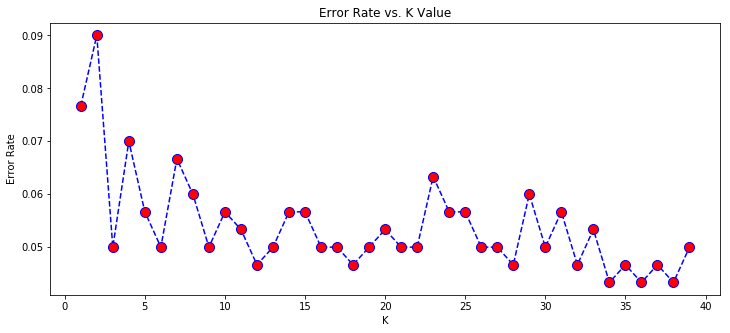

In [59]:
#Step 2: Plot the graph based on error_rate for each k value.

plt.figure(figsize=(12,5))
x = range(1,40)
y = error_rate

plt.plot(x, y , color='b', ls='--', marker='o', markerfacecolor='red', ms=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

* Here we can see that that after arouns K>23 the error rate just tends to lower around 0.06-0.05 
* Let's compare the k=1 and k=27

In [62]:
# K=1
print("KNN: K = 1")
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

print("Classification_report for K=1:\n", classification_report(y_test, predictions))
print("\n confusion_matrix for K=1:\n", confusion_matrix(y_test, predictions))

KNN: K = 1
Classification_report for K=1:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300


 confusion_matrix for K=1:
 [[151   8]
 [ 15 126]]


In [63]:
# K=27
print("KNN: K = 27")
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

print("Classification_report for K=27:\n", classification_report(y_test, predictions))
print("\n confusion_matrix for K=27:\n", confusion_matrix(y_test, predictions))

KNN: K = 27
Classification_report for K=27:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       159
           1       0.95      0.94      0.95       141

   micro avg       0.95      0.95      0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300


 confusion_matrix for K=27:
 [[152   7]
 [  8 133]]


#### Note: with K = 27 we are getting 95% accuracy and K=1 we are getting 92% . 
#### So K =27 will be best fit in this case.